# **Understanding Data – COVID-19 Time Series**

### **Mục lục**

### **1.Định nghĩa vấn đề**

**1.1 Bối cảnh dữ liệu**

Bộ dữ liệu COVID-19 mà Johns Hopkins University cung cấp là một hệ thống ghi nhận số ca bệnh theo chuỗi thời gian (time series), được tổng hợp từ các cơ quan y tế quốc gia trên toàn thế giới. Đây là một trong những nguồn dữ liệu được sử dụng rộng rãi nhất trong suốt thời kỳ đại dịch, hỗ trợ báo chí, cơ quan quản lý, các tổ chức nghiên cứu và cộng đồng theo dõi tình hình dịch bệnh theo từng ngày.

Dữ liệu bao gồm 3 nhóm chính:
1. Confirmed – Tổng số ca nhiễm được xác nhận
2. Deaths – Tổng số ca tử vong
3. Recovered – Tổng số ca hồi phục

Mỗi bảng đều được lưu theo dạng "wide format": mỗi dòng là một quốc gia/vùng lãnh thổ, và mỗi cột tương ứng với một ngày ghi nhận kể từ tháng 1/2020.

Dữ liệu giúp mô tả:
- Diễn biến dịch bệnh qua thời gian
- Sự khác nhau về tốc độ lây lan giữa các khu vực
- Các giai đoạn bùng phát, đạt đỉnh và suy giảm
- Tác động của chính sách phòng chống dịch
- Tỉ lệ tử vong và khả năng phục hồi theo từng quốc gia

### **2.Chuẩn bị vấn đề**

**2.1 Khai báo thư viện**

In [ ]:
import pandas as pd
import numpy as np

'c:\\Users\\Dell\\OneDrive\\Máy tính\\bcck-data-covid\\Covid19-Data-Analysis\\notebooks'

**2.2 Nạp dữ liệu**

In [ ]:
confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
deaths    = pd.read_csv("time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("time_series_covid19_recovered_global.csv")

### **3. Tổng quan & thông tin các bảng**

**3.1 Cấu trúc dữ liệu (ERD – dạng logic)**

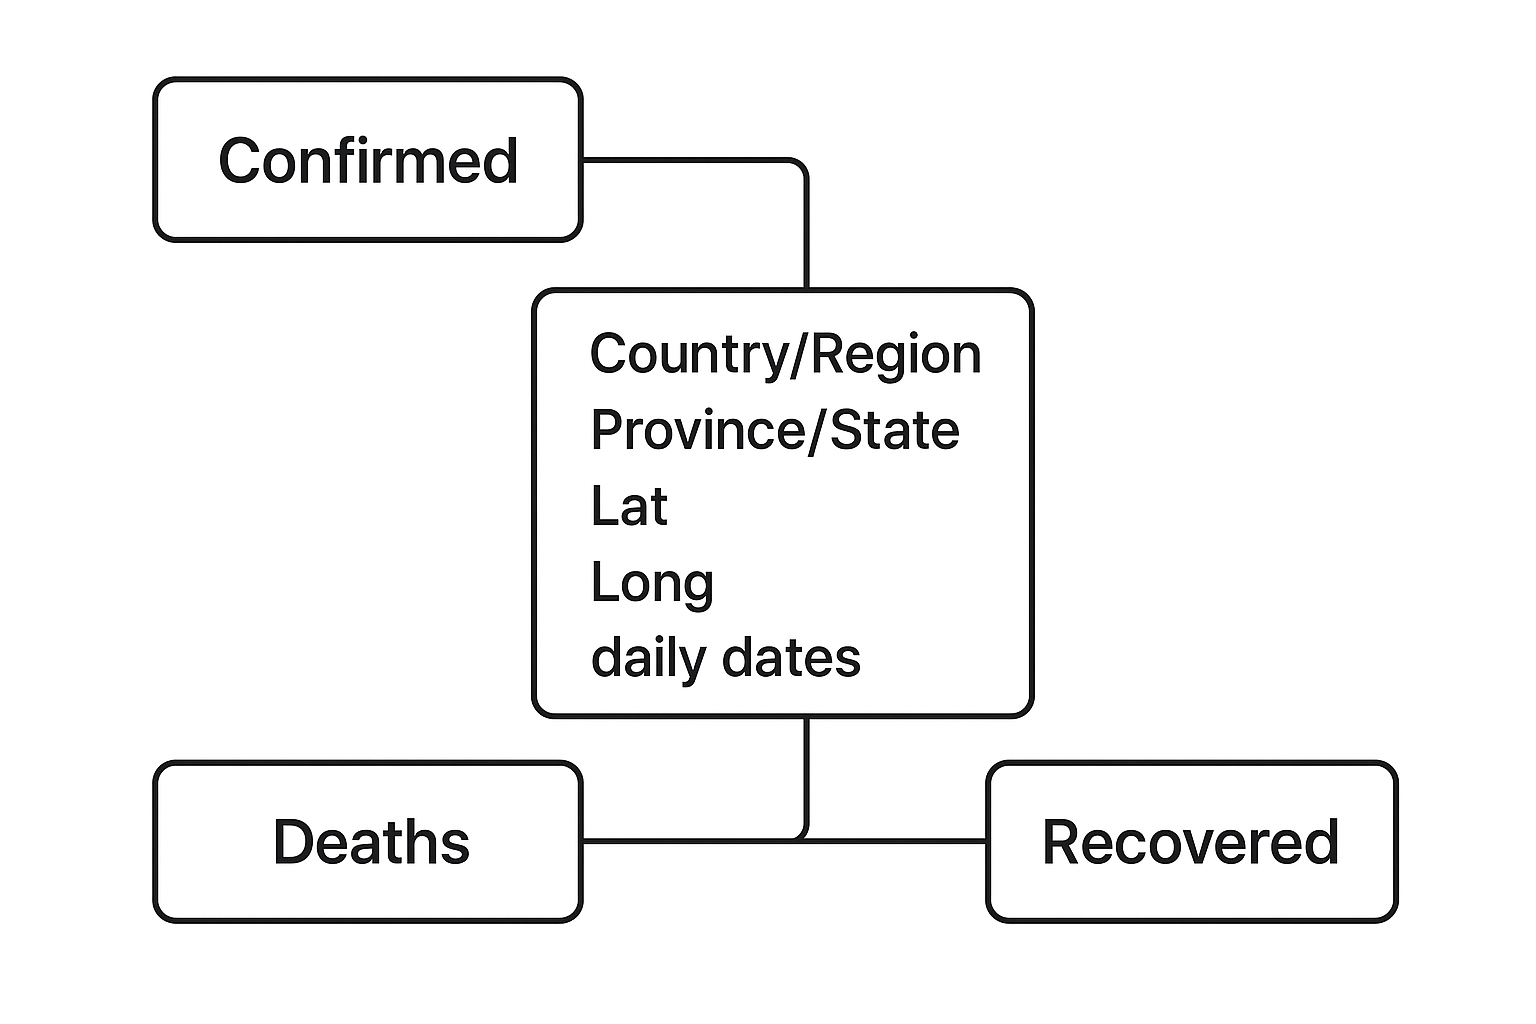

**3.2 Thông tin các bảng**

- Dữ liệu gồm ba bảng chính: Confirmed, Deaths, Recovered.
- Mỗi bảng chứa số ca theo từng ngày, được ghi nhận theo quốc gia hoặc tỉnh/tiểu bang.

In [ ]:
confirmed.shape
deaths.shape
recovered.shape

**Kết quả thống kê cấu trúc dữ liệu**

Mỗi bảng có khoảng ~280 hàng, tương ứng với tổng số quốc gia + các tỉnh của Canada, Australia, Trung Quốc…

Có khoảng ~750 cột, trong đó:
4 cột đầu là thông tin địa lý:
- Province/State
- Country/Region
- Lat
- Long

Các cột còn lại là dải ngày theo định dạng mm/dd/yy, bắt đầu từ:

22/01/2020 → gần cuối 2022/2023 (tùy bản cập nhật)

 **Ý nghĩa cấu trúc**

- Mỗi hàng = 1 đơn vị địa lý (quốc gia hoặc tỉnh).
- Mỗi cột từ ngày 22/1/2020 = số ca của ngày đó.
- Cấu trúc dạng wide format, cần pivot/melt nếu muốn phân tích chuỗi thời gian theo dạng long.

### **4. Thống kê mô tả**

**4.1 Bảng Confirmed (Ca nhiễm tích lũy)**

**(1) Hiển thị thông tin**

Nhận xét:

- ~280 dòng
- Không có giá trị âm
- Một số quốc gia có nhiều province (Canada, China)
- Một số nơi không có Province → giá trị NaN

In [ ]:
print(confirmed.shape)
confirmed.info()
display(confirmed.head(2))

**(2) Kiểm tra tính toàn vẹn dữ liệu**

Nhận xét:

- Có NaN ở cột Province/State (đúng theo thiết kế)
- Không có dòng trùng
- Không có giá trị âm trong dữ liệu tích lũy

In [ ]:
confirmed.isnull().sum()
confirmed.duplicated().sum()
(confirmed.iloc[:, 4:] < 0).sum().sum()

**4.2 Bảng Deaths (Ca tử vong tích lũy)**

**(1) Hiển thị thông tin**

Nhận xét:

- Số lượng dòng = bảng confirmed
- Một số quốc gia báo chậm → số liệu không tăng đều
- Không có cột ngày thiếu

In [ ]:
print(deaths.shape)
deaths.info()
display(deaths.head(2))

**(2) Kiểm tra tính toàn vẹn dữ liệu**

Nhận xét:

- Có tỉnh NaN
- Không có giá trị âm
- Một số thời điểm số tử vong giữ nguyên nhiều ngày (do không cập nhật)

**4.3 Bảng Recovered (Ca hồi phục)**

**(1) Hiển thị thông tin**

Nhận xét:

- Số dòng ít hơn confirmed/deaths
- Nhiều quốc gia hoàn toàn không ghi nhận recovered
- Dữ liệu có thể không liên tục sau 2021

**(2) Kiểm tra tính toàn vẹn**

In [ ]:
recovered.isnull().sum()
recovered.duplicated().sum()

### **5. Hiểu dữ liệu từ góc nhìn dịch tễ học**

**5.1 Ý nghĩa các bảng dữ liệu**

| Bảng      | Mục đích                     | Biến quan trọng |
| --------- | ---------------------------- | --------------- |
| confirmed | Ca nhiễm tích lũy theo ngày  | tất cả cột ngày |
| deaths    | Ca tử vong tích lũy          | tất cả cột ngày |
| recovered | Ca hồi phục tích lũy         | tất cả cột ngày |
| Lat/Long  | phục vụ trực quan hóa bản đồ | Lat, Long       |


**5.2 Các biến quan trọng cho phân tích COVID**

- Daily New Cases = diff của confirmed
- Daily Deaths = diff của deaths
- Growth Rate
- Mortality Rate
- deaths / confirmed
- Recovery Rate
- recovered / confirmed
- Case Fatality Ratio (CFR)
- Trend Analysis theo quốc gia

**5.3 Mục tiêu phân tích**

- Xác định mức độ nghiêm trọng của dịch theo từng giai đoạn.
- So sánh tốc độ lây lan giữa các khu vực.
- Dự báo xu hướng dịch bệnh (Time Series Forecasting).
- Hỗ trợ trực quan hóa cho báo cáo dịch tễ học.